In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost func in pure python
# cost function is sum of cost vlaue: (H(xi) - Yi) ** 2
def cost_func_pure(W, X, Y):
  c = 0
  for i in range(len(X)):
    c+=(W * X[i] - Y[i]) ** 2
  return c/len(X)

for feed_W in np.linspace(-3, 5, num=15):
  curr_cost = cost_func_pure(feed_W, X, Y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


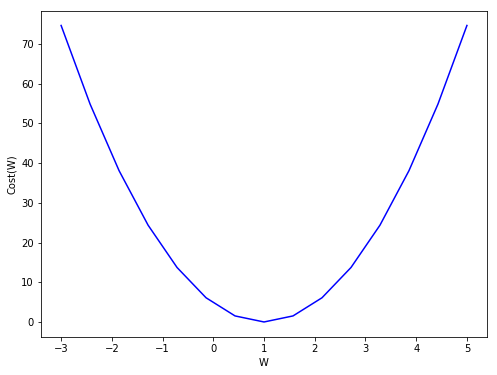

In [0]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

# cost function in Tensorflow
# cost function is sum of cost vlaue: (H(xi) - Yi) ** 2
def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

plt.rcParams["figure.figsize"] = (8,6)
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

# How to minimize cost
 - 현재 데이터 X와 Y에 대해 W가 1일때 cost가 가장 작다
 - cost가 최소가 되는 W를 어떻게 찾을 수 있을까?
 
# Gradient descent algorithm
 - Minimize cost function
 - used many minimization problems
 - For a given cost(W, b), it will find W, b to minimize cost
 - It can be applied to more general function: cost (w1, w2, ...)
 
# How does it work?
  - Start with initial guesses
    - Start at 0,0(or any other value)
    - Keeping changing W and b a little bit to try and reduce cost (W, b)
  - Each time you change the parameters, you select the gradient which reduces cost(W, b) the most possible
  - Repeat
  - Do so until you converge to a local minimum
  - Has an interesting property
    - Where you start can determine which minimum you end up
 
# definition
 

In [0]:
# Gradient descent 구현
tf.set_random_seed(0) # for reproducibility
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random_normal([1], -100., 100.))

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  
  learning_rate = 0.01
  # compute gradient of cost: avg((W*X - Y) * X)
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  # W = W-변화량
  # 변화량: 현 위치(W)에서 비용곡선의 기울기(=미분값) x learning_rate
  # learning rate: 시도 간격
  descent = W - tf.multiply(learning_rate, gradient)
  W.assign(descent)
  
  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

print("5 * W: {0}".format(5.0 * W))
print("2.5 * W: {0}".format(2.5 * W))


Instructions for updating:
Colocations handled automatically by placer.
    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
